In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('clean_tweets.csv')

In [3]:
df.head()

,Unnamed: 0,sentiment,text,Preclean_Length
0,0,0,awww that s a bummer you shoulda got david car...,115
1,1,0,is upset that he can not update his facebook b...,111
2,2,0,i dived many times for the ball managed to sav...,89
3,3,0,my whole body feels itchy and like its on fire,47
4,4,0,no it s not behaving at all i m mad why am i h...,111


In [4]:
df.drop(['Unnamed: 0'], axis=1, inplace = True)

In [5]:
df.describe()

,sentiment,Preclean_Length
count,1.600000e+06,1.600000e+06
mean,2.000000e+00,7.409011e+01
std,2.000001e+00,3.644114e+01
min,0.000000e+00,6.000000e+00
25%,0.000000e+00,4.400000e+01
50%,2.000000e+00,6.900000e+01
75%,4.000000e+00,1.040000e+02
max,4.000000e+00,3.740000e+02


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 3 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   sentiment        1600000 non-null  int64 
 1   text             1596714 non-null  object
 2   Preclean_Length  1600000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 36.6+ MB


In [7]:
df[df['text'].isnull()].count()

sentiment          3286
text                  0
Preclean_Length    3286
dtype: int64

In [8]:
cols = ['sentiment', 'id', 'date', 'query_string', 'user', 'text']
DATASET_ENCODING = "ISO-8859-1"
df2 = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding=DATASET_ENCODING, header=None, names=cols)

In [9]:
df2.iloc[df[df['text'].isnull()].index].head()

,sentiment,id,date,query_string,user,text
208,0,1467863072,Mon Apr 06 22:33:25 PDT 2009,NO_QUERY,Artiel87,@mandayyy
249,0,1467874569,Mon Apr 06 22:36:27 PDT 2009,NO_QUERY,Artiel87,@mandayyy
398,0,1467912842,Mon Apr 06 22:46:53 PDT 2009,NO_QUERY,KimberlyKane,@danadearmond
430,0,1467919452,Mon Apr 06 22:48:48 PDT 2009,NO_QUERY,jtmal0723,@anistorm
1011,0,1468061127,Mon Apr 06 23:30:23 PDT 2009,NO_QUERY,gabysslave,@citizensheep


Hence, because of data cleaning, some tweets now have NULL values. This is because those tweets comprised only of mentions or url links. Hence, these Null values must be dropped.

In [10]:
df.dropna(inplace=True)

In [11]:
df['sentiment'] = df['sentiment'].map({0:0,4:1})

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1596714 entries, 0 to 1599999
Data columns (total 3 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   sentiment        1596714 non-null  int64 
 1   text             1596714 non-null  object
 2   Preclean_Length  1596714 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 48.7+ MB


# Text Visualisation

### Word Cloud

In [13]:
# import sys
# !{sys.executable} -m pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

In [14]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color='black', stopwords=stopwords, 
                      max_font_size=40, random_state=42).generate(str(df['text']))

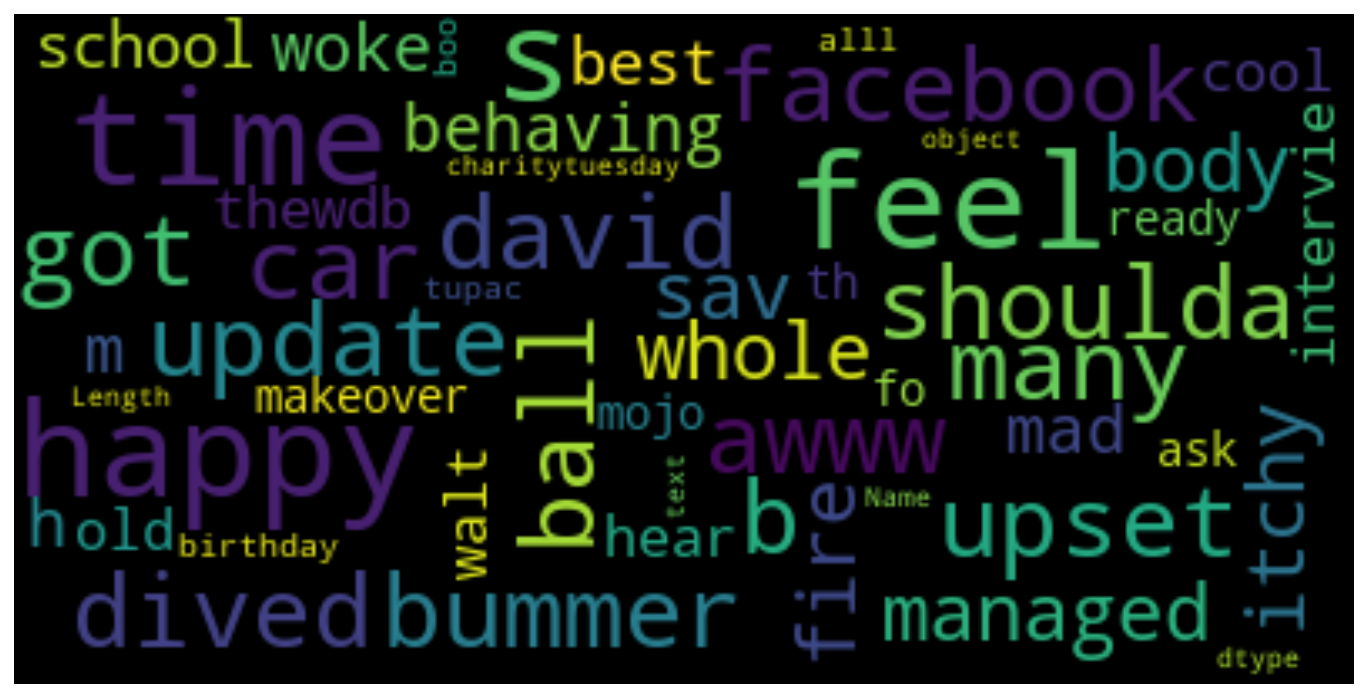

In [15]:
fig = plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

This word cloud consists of the words which have the highest frequency among all the tweets, positive and negative both.

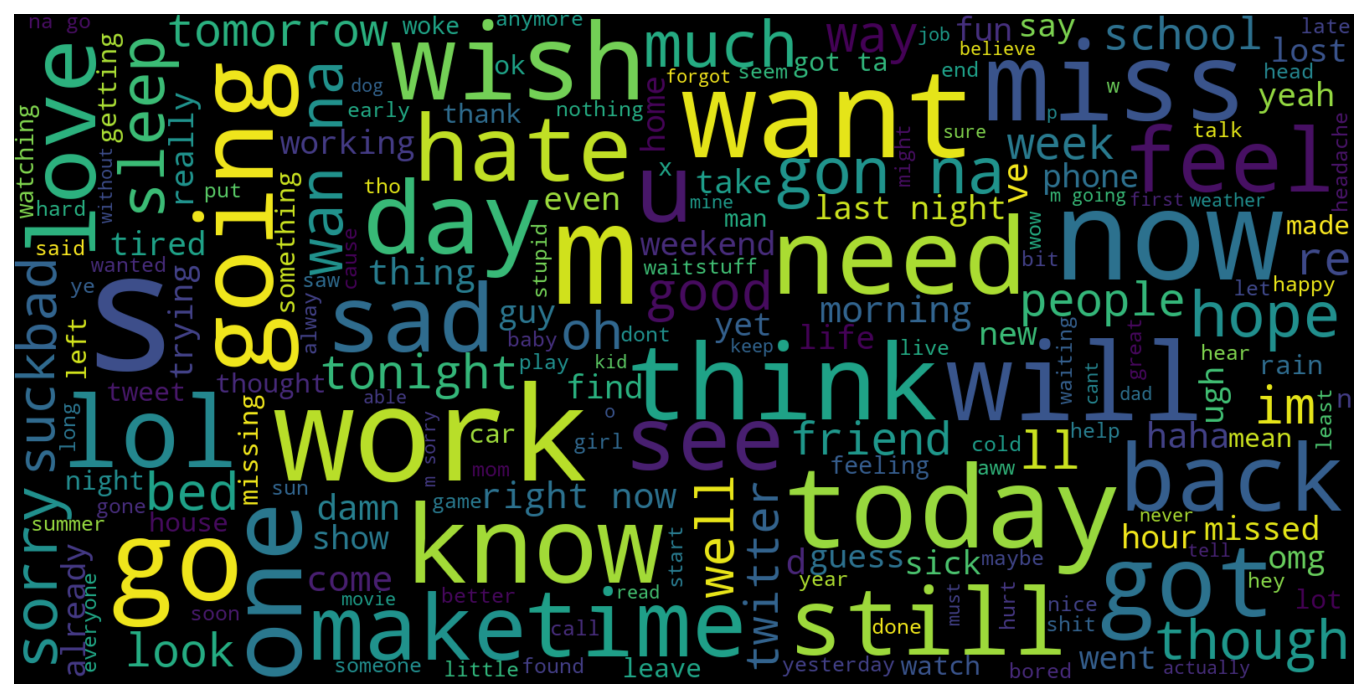

In [16]:
negative_tweets = df[df['sentiment']==0]

neg_tweet = []
for tweet in negative_tweets.text:
    neg_tweet.append(tweet)
neg_tweet = pd.Series(neg_tweet).str.cat(sep = ' ')

neg_wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_tweet)
plt.figure(figsize=(12,10))
plt.imshow(neg_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Some words, like, "today", "one", "still" can be termed as neutral. Words like, "sad", "bad", "hate", "suck", "wish" etc. make sense as negative words.

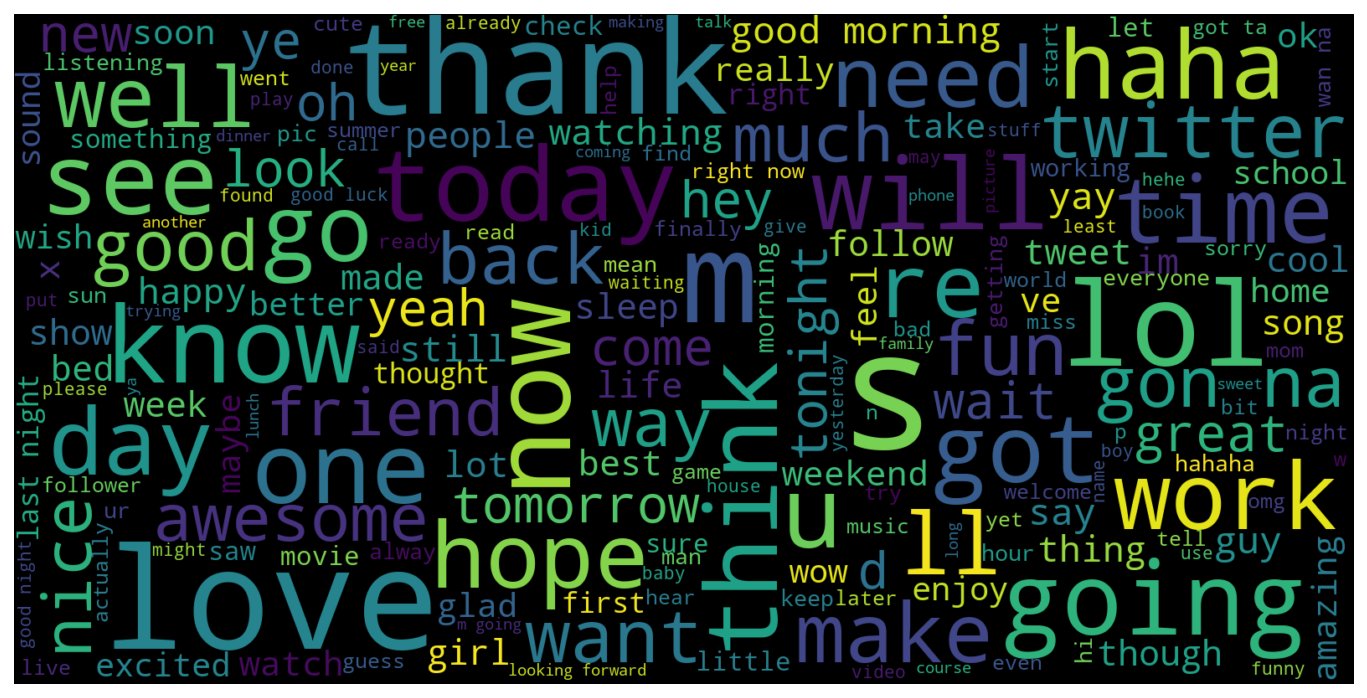

In [17]:
positive_tweets = df[df['sentiment']==1]

pos_tweet = []
for tweet in positive_tweets.text:
    pos_tweet.append(tweet)
pos_tweet = pd.Series(pos_tweet).str.cat(sep = ' ')

pos_wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(pos_tweet)
plt.figure(figsize=(12,10))
plt.imshow(pos_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In this wordcloud of positive tweets, neutral words, like "today", "tonight", "still", etc are present. Also, words like "thank", "haha", "awesome", "good", etc stand out as the positive words.

Words like "today", "lol", "tonight", "still", "work" etc are common in both the positive and negative tweets. Hence, it can be concluded that people have both positive and negative response towards work and their day.

## Preparing the text for data visualisation using CountVectorizer

The CountVectorizer( used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text) provides a simple way to both tokenize a collection of text documents and build a vocabulary of known words, but also to encode new documents using that vocabulary.

In [4]:
# import sys
# !{sys.executable} -m pip install CountVectorizer
# import sys
# !{sys.executable} -m pip install sklearn
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
vect = CountVectorizer()

In [6]:
vect.fit(df.text)
#Tokenise and build vocab

NameError: name 'df' is not defined

In [21]:
len(vect.get_feature_names())

c:\users\star\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


271304

Hence, the corpus consists of 271306 different words.

In [22]:
#Encode document
neg_matrix = vect.transform(df[df.sentiment==0].text)
pos_matrix = vect.transform(df[df.sentiment==1].text)

In [23]:
neg_tf = np.sum(neg_matrix, axis=0)
pos_tf = np.sum(pos_matrix, axis=0)

In [24]:
#Remove single-dimensional entries from the shape of an array
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))

In [25]:
term_freq_df = pd.DataFrame([neg, pos], columns = vect.get_feature_names()).transpose()

In [26]:
term_freq_df.head()

,0,1
aa,168,97
aaa,97,55
aaaa,45,29
aaaaa,26,12
aaaaaa,16,12


In [27]:
term_freq_df.columns = ['negative', 'positive']

In [28]:
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['positive']

Hence, after calculating the term frequency data, we find that the most frequent words are the stopwords.

In [29]:
term_freq_df.sort_values(by='total', ascending=False).head(20)

,negative,positive,total
to,313185,252600,565785
the,257953,266161,524114
my,190805,125981,316786
it,157491,147841,305332
and,153985,149692,303677
you,103865,198274,302139
not,196637,87771,284408
is,133533,111325,244858
in,115628,101297,216925
for,99044,117389,216433


In [32]:
term_freq_df.to_csv('term_freq_data.csv', encoding='ISO-8859-1')

In [31]:
term_freq_df.head(20)